In [1]:
"""构造数据
"""
from sklearn.datasets import make_blobs

blobs, _ = make_blobs(n_samples=200, centers=3, random_state=18)
blobs[:10] # 打印出

array([[ 8.28390539,  4.98011149],
       [ 7.05638504,  7.00948082],
       [ 7.43101466, -6.56941148],
       [ 8.20192526, -6.4442691 ],
       [ 3.15614247,  0.46193832],
       [ 7.7037692 ,  6.14317389],
       [ 5.62705611, -0.35067953],
       [ 7.53828533, -4.86595492],
       [ 8.649291  ,  3.98488194],
       [ 7.91651636,  4.54935348]])

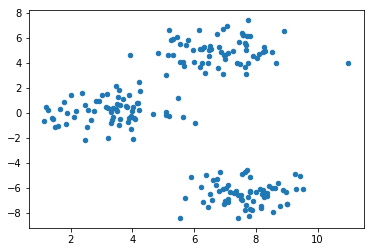

In [2]:
"""数据展示
"""
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(blobs[:, 0], blobs[:, 1], s=20);

In [3]:
"""初始化中心点
"""
import numpy as np

def random_k(k, data):
    """
    参数:
    k -- 中心点个数
    data -- 数据集

    返回:
    init_centers -- 初始化中心点
    """
    
    prng = np.random.RandomState(27) # 定义随机种子
    num_feature=np.shape(data)[1]
    init_centers = prng.randn(k, num_feature)*5 # 由于初始化的随机数是从-1到1，为了更加贴近数据集这里乘了一个 5
    return init_centers

init_centers=random_k(3, blobs)
init_centers

array([[ 6.42802708, -1.51776689],
       [ 3.09537831,  1.97999275],
       [ 1.11702824, -0.27169709]])

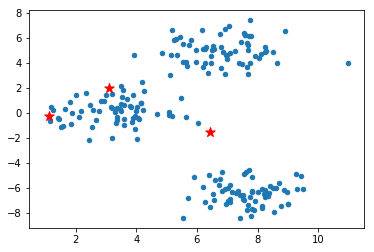

In [4]:
"""初始中心点展示
"""
plt.scatter(blobs[:, 0], blobs[:, 1], s=20);
plt.scatter(init_centers[:,0], init_centers[:,1], s=100, marker='*', c="r")

In [5]:
"""计算欧氏距离
"""
def d_euc(x, y):
    """
    参数:
    x -- 数据 a
    y -- 数据 b

    返回:
    d -- 数据 a 和 b 的欧氏距离
    """
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [6]:
"""中心点的更新
"""
def update_center(clusters, data, centers):
    """
    参数:
    clusters -- 每一点分好的类别
    data -- 数据集
    centers -- 中心点集合

    返回:
    new_centers.reshape(num_centers,num_features) -- 新中心点集合
    """

    num_centers = np.shape(centers)[0]  # 中心点的个数
    num_features = np.shape(centers)[1]  # 每一个中心点的特征数
    container = []
    for x in range(num_centers):
        each_container = []
        container.append(each_container)  # 首先创建一个容器,将相同类别数据存放到一起

    for i, cluster in enumerate(clusters):
        container[cluster].append(data[i])

    # 为方便计算，将 list 类型转换为 np.array 类型
    container = np.array(list(map(lambda x: np.array(x), container)))

    new_centers = np.array([])  # 创建一个容器，存放中心点的坐标
    for i in range(len(container)):
        each_center = np.mean(container[i], axis=0)  # 计算每一子集中数据均值作为中心点
        new_centers = np.append(new_centers, each_center)

    return new_centers.reshape(num_centers, num_features)  # 以矩阵的方式返回中心点坐标

In [7]:
"""K-Means 聚类
"""

def kmeans_cluster(data, init_centers, k):
    """
    参数:
    data -- 数据集
    init_centers -- 初始化中心点集合
    k -- 中心点个数

    返回:
    centers_container -- 每一次更新中心点的集合
    cluster_container -- 每一次更新类别的集合
    """
    max_step = 50  # 定义最大迭代次数，中心点最多移动的次数。
    epsilon = 0.001  # 定义一个足够小的数，通过中心点变化的距离是否小于该数，判断中心点是否变化。

    old_centers = init_centers

    centers_container = []  # 建立一个中心点容器，存放每一次变化后的中心点，以便后面的绘图。
    cluster_container = []  # 建立一个分类容器，存放每一次中心点变化后数据的类别
    centers_container.append(old_centers)

    for step in range(max_step):
        cluster = np.array([], dtype=int)
        for each_data in data:
            distances = np.array([])
            for each_center in old_centers:
                temp_distance = d_euc(each_data, each_center)  # 计算样本和中心点的欧式距离
                distances = np.append(distances, temp_distance)
            lab = np.argmin(distances)  # 返回距离最近中心点的索引，即按照最近中心点分类
            cluster = np.append(cluster, lab)
        cluster_container.append(cluster)

        new_centers = update_center(cluster, data, old_centers)  # 根据子集分类更新中心点

        # 计算每个中心点更新前后之间的欧式距离
        difference = []
        for each_old_center, each_new_center in zip(old_centers, new_centers):
            difference.append(d_euc(each_old_center, each_new_center))
        
        if (np.array(difference) < epsilon).all():  # 判断每个中心点移动是否均小于 epsilon
            return centers_container, cluster_container

        centers_container.append(new_centers)
        old_centers = new_centers

    return centers_container, cluster_container

In [8]:
"""计算最终中心点
"""
centers_container, cluster_container = kmeans_cluster(blobs, init_centers, 3)
final_center = centers_container[-1]
final_cluster = cluster_container[-1]
final_center

array([[ 7.67007252, -6.44697348],
       [ 6.83832746,  4.98604668],
       [ 3.28477676,  0.15456871]])

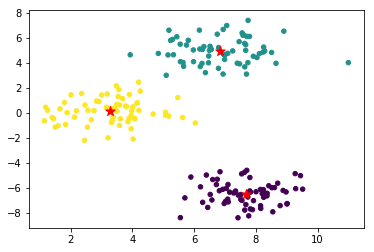

In [9]:
"""可视化展示
"""
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=final_cluster);
plt.scatter(final_center[:,0], final_center[:,1], s=100, marker='*', c="r")

Text(0.5,1,'final center')

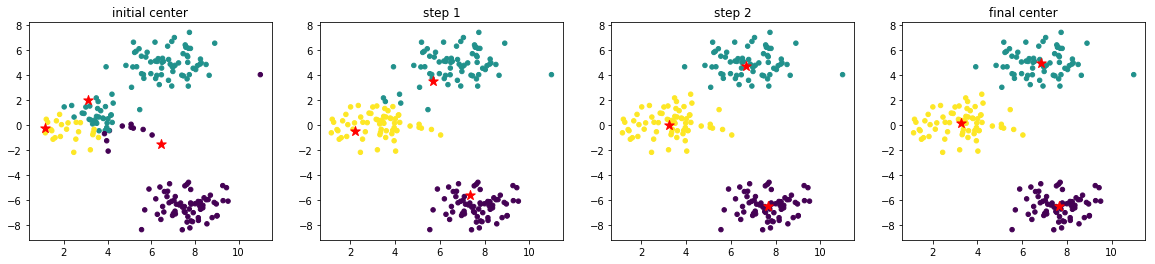

In [10]:
num_axes = len(centers_container)

fig, axes = plt.subplots(1, num_axes, figsize=(20, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[0])
axes[0].scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker='*', c="r")
axes[0].set_title("initial center")

for i in range(1, num_axes-1):
    axes[i].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[i])
    axes[i].scatter(centers_container[i][:, 0],
                    centers_container[i][:, 1], s=100, marker='*', c="r")
    axes[i].set_title("step {}".format(i))

axes[-1].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[-1])
axes[-1].scatter(final_center[:, 0], final_center[:, 1], s=100, marker='*', c="r")
axes[-1].set_title("final center")

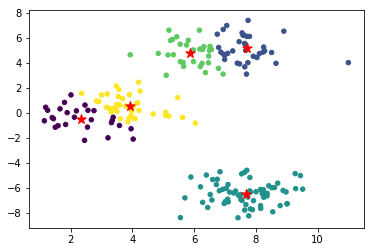

In [11]:
"""用 scikit-learn 聚类并绘图
"""
from sklearn.cluster import k_means
model = k_means(blobs, n_clusters=5)

centers = model[0]
clusters_info = model[1]
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_info)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='*', c="r")

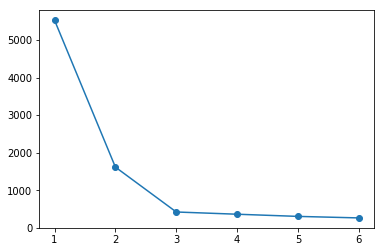

In [12]:
index = [] # 横坐标数组
inertia = [] # 纵坐标数组

# K 从 1~ 6 聚类
for i in range(6):
    model = k_means(blobs, n_clusters=i + 1)
    index.append(i + 1)
    inertia.append(model[2])

# 绘制折线图
plt.plot(index, inertia, "-o")

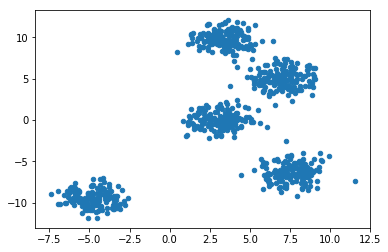

In [13]:
"""生成数据并展示
"""
blobs_plus, _ = make_blobs(n_samples=800, centers=5, random_state=18)  # 生成数据

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)  # 将数据可视化展示

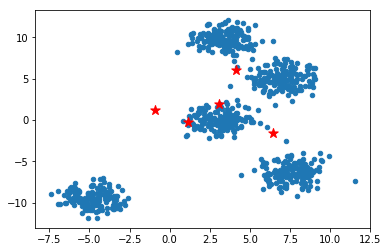

In [14]:
km_init_center=random_k(5, blobs_plus)

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20);
plt.scatter(km_init_center[:,0], km_init_center[:,1], s=100, marker='*', c="r")

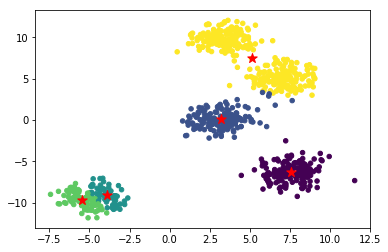

In [15]:
km_centers, km_clusters = kmeans_cluster(blobs_plus, km_init_center, 5)
km_final_center = km_centers[-1]
km_final_cluster = km_clusters[-1]
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=km_final_cluster)
plt.scatter(km_final_center[:, 0], km_final_center[:, 1], s=100, marker='*', c="r")

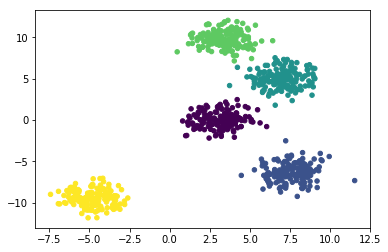

In [16]:
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=_)

In [17]:
def get_sum_dis(centers, data):
    """
    参数:
    centers -- 中心点集合
    data -- 数据集

    返回:
    np.sum(dis_container) -- 样本距离最近中心点的距离之和
    dis_container -- 样本距离最近中心点的距离集合
    """
    
    dis_container = np.array([])
    for each_data in data:
        distances = np.array([])
        for each_center in centers:
            temp_distance = d_euc(each_data, each_center)  # 计算样本和中心点的欧式距离
            distances = np.append(distances, temp_distance)
        lab = np.min(distances)
        dis_container = np.append(dis_container, lab)
    return np.sum(dis_container), dis_container

In [18]:
"""K-Means++ 初始化中心点
"""
def get_init_center(data, k):
    """
    参数:
    data -- 数据集
    k -- 中心点个数

    返回:
    np.array(center_container) -- 初始化中心点集合
    """
    
    seed = np.random.RandomState(20)
    p = seed.randint(0, len(data))
    first_center = data[p]

    center_container = []
    center_container.append(first_center)

    for i in range(k-1):
        sum_dis, dis_con = get_sum_dis(center_container, data)
        r = np.random.randint(0, sum_dis)
        for j in range(len(dis_con)):
            r = r - dis_con[j]
            if r <= 0:
                center_container.append(data[j])
                break
            else:
                pass

    return np.array(center_container)

In [19]:
plus_init_center = get_init_center(blobs_plus, 5)
plus_init_center

array([[  4.1661903 ,   0.81807492],
       [ -5.51796   ,  -9.95837835],
       [ -3.92554975, -11.23912837],
       [  6.16737283,   4.60970163],
       [  3.49614883,   8.89128715]])

Text(0.5,1,'final center')

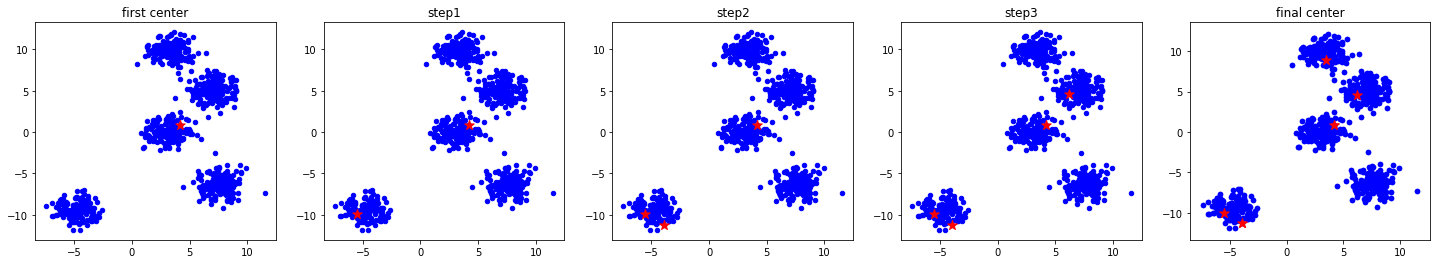

In [20]:
num = len(plus_init_center)

fig, axes = plt.subplots(1, num, figsize=(25, 4))

axes[0].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[0].scatter(plus_init_center[0, 0], plus_init_center[0, 1], s=100, marker='*', c="r")
axes[0].set_title("first center")

for i in range(1, num):
    axes[i].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
    axes[i].scatter(plus_init_center[:i+1, 0],
                    plus_init_center[:i+1, 1], s=100, marker='*', c="r")
    axes[i].set_title("step{}".format(i))

axes[-1].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[-1].scatter(plus_init_center[:, 0], plus_init_center[:, 1], s=100, marker='*', c="r")
axes[-1].set_title("final center")

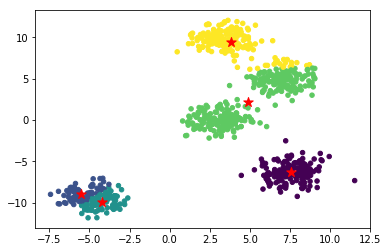

In [21]:
plus_centers, plus_clusters = kmeans_cluster(blobs_plus, plus_init_center, 5)
plus_final_center = plus_centers[-1]
plus_final_cluster = plus_clusters[-1]

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=plus_final_cluster)
plt.scatter(plus_final_center[:, 0], plus_final_center[:, 1], s=100, marker='*', c="r")

Text(0.5,1,'Mini Batch K-Means')

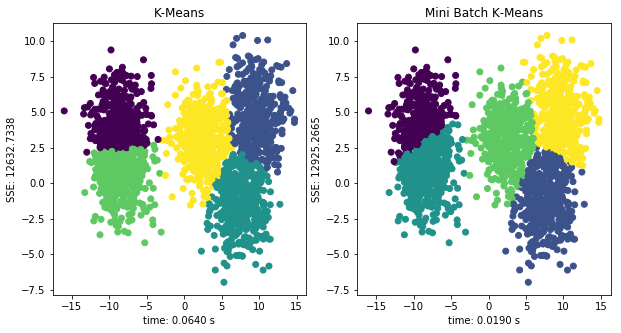

In [22]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans


test_data, _ = make_blobs(2000, n_features=2, cluster_std=2, centers=5)

km = KMeans(n_clusters=5)
mini_km = MiniBatchKMeans(n_clusters=5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, model in enumerate([km, mini_km]):
    t0 = time.time()
    model.fit(test_data)
    t1 = time.time()
    t = t1 - t0
    sse = model.inertia_
    axes[i].scatter(test_data[:, 0], test_data[:, 1], c=model.labels_)
    axes[i].set_xlabel("time: {:.4f} s".format(t))
    axes[i].set_ylabel("SSE: {:.4f}".format(sse))

axes[0].set_title("K-Means")
axes[1].set_title("Mini Batch K-Means")